In [1]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os

# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from wordcloud import WordCloud
from matplotlib.lines import Line2D

In [2]:
# Import the Data
mir_link_id = pd.read_csv('/kaggle/input/media-study/mir_afsar_ali_yt_links - Sheet1.csv')


def extract_video_id(url):
    # Regular expression pattern to match YouTube video IDs
    pattern = r'(?:youtube\.com\/(?:[^\/\n\s]+\/\S+\/|(?:v|e(?:mbed)?)\/|\S*?[?&]v=)|youtu\.be\/)([a-zA-Z0-9_-]{11})'

    # Search for the video ID in the URL
    match = re.search(pattern, url)

    if match:
        return match.group(1)  # Return the matched video ID
    else:
        return None  # Return None if no match found

# Example URLs
urls = mir_link_id['yt_link']

video_ids = [extract_video_id(url) for url in urls]
mir_link_id['video_id'] = video_ids

print(mir_link_id.category.value_counts())


mirer_thek_vids = mir_link_id[mir_link_id['category'] == 'mirerthek']['video_id'].tolist()
mir_soho_vids = mir_link_id[mir_link_id['category'] == 'mir soho']['video_id'].tolist()
mir_chara_vids = mir_link_id[mir_link_id['category'] == 'mir chara']['video_id'].tolist()

print(f'{len(mirer_thek_vids)} {len(mir_soho_vids)} {len(mir_chara_vids)}')

category
mir soho     304
mir chara    168
mirerthek     62
Name: count, dtype: int64
62 304 168


In [3]:
print(len(set(mir_soho_vids)))

202


## Mir Chara Sunday Suspense

In [4]:
mc_com = pd.read_csv('/kaggle/input/media-study/mir_chara_comment.csv')
mc_chat = pd.read_csv('/kaggle/input/media-study/mir_chara_data.csv')

ms_com = pd.read_csv('/kaggle/input/media-study/mir_soho_comment.csv')
ms_chat = pd.read_csv('/kaggle/input/media-study/mir_soho_data.csv')

mt_com = pd.read_csv('/kaggle/input/media-study/mirer_thek_comment.csv')
mt_chat = pd.read_csv('/kaggle/input/media-study/mirer_thek_data.csv')

print(f'Length of Mir Chara Comments is {mc_com.shape}')
print(f'Length of Mir Chara live chat is {mc_chat.shape}')

print('Total Videos Scraped', mc_com['video_id'].nunique())

mc_com.head(3)

/tmp/ipykernel_154/2473098554.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  ms_com = pd.read_csv('/kaggle/input/media-study/mir_soho_comment.csv')


Length of Mir Chara Comments is (167665, 7)
Length of Mir Chara live chat is (185996, 3)
Total Videos Scraped 167


,author,published_date,published_time,like_count,text,video_id,public
0,@AbolTabol-1,2024-02-15,23:29:02Z,0,ভবানী পাঠক,gB6pX3OJYbA,True
1,@krishnaroy9482,2024-02-11,14:35:02Z,1,দারুণ উপস্থাপনা❤❤,gB6pX3OJYbA,True
2,@rijubiswas3478,2024-01-23,16:29:02Z,0,❤,gB6pX3OJYbA,True


In [5]:
mc_chat.head(3)

,datetime,author,message
0,2022-07-17 07:29:42,Samrat Biswas,hi
1,2022-07-17 07:29:42,movie explain all VARITIES,hi
2,2022-07-17 07:29:43,rahul shaw,killu


In [6]:
mc_com.drop(columns = ['published_time', 'video_id', 'public'], inplace=True)
ms_com.drop(columns = ['published_time', 'video_id', 'public'], inplace=True)
mt_com.drop(columns = ['published_time', 'video_id', 'public'], inplace=True)

mc_com.head(3)

,author,published_date,like_count,text
0,@AbolTabol-1,2024-02-15,0,ভবানী পাঠক
1,@krishnaroy9482,2024-02-11,1,দারুণ উপস্থাপনা❤❤
2,@rijubiswas3478,2024-01-23,0,❤


In [7]:
# Assuming df is your DataFrame
mc_com['text'] = mc_com['text'].astype(str)
ms_com['text'] = ms_com['text'].astype(str)
mt_com['text'] = mt_com['text'].astype(str)
mc_chat['message'] = mc_chat['message'].astype(str)

In [8]:
import langid

def detect_language(text):
    x = langid.classify(text)[0]
    if  x == 'bn':
        return 'bangla'
    elif x == 'en':
        return 'english'
    else:
        return 'banglish'


In [9]:
print(mt_com['text'][0])
detect_language(mt_com['text'][0])

লুৎফুন্নিসার ফন্দি কি সফল হল? কাপালিকই বা কোথায়? কেমন লাগলো কপালকুণ্ডলা - দ্বিতীয় ও শেষ পর্ব, কমেন্ট করে গপ্পোমীরকে জানাতে ভুলো না।


'bangla'

In [10]:
tqdm.pandas()
# mt_com['language'] = mt_com['text'].progress_apply(detect_language)

In [11]:
mt_com

,author,published_date,like_count,text
0,@realmir,2024-03-23,353,লুৎফুন্নিসার ফন্দি কি সফল হল? কাপালিকই বা কোথা...
1,@fahimreza5229,2024-03-23,5,"Oshadharon Sir ❤❤🎉🎉 , bhalo thakben....🎉🎉ekta ..."
2,@brokenhp4535,2024-03-23,6,মনটা খারাপ হয়ে গেলো 😢😢😢😢
3,@swastikadas7042,2024-03-23,2,কিছুই বলার অবকাশ নেই গো... মন্ত্র মুগ্ধের মত শ...
4,@brokenhp4535,2024-03-23,1,পরবর্তী গল্পের গল্প শেষে যেন মিলন থেকে ❤❤❤
...,...,...,...,...
89872,@meghgalaxy9213,2023-01-23,0,Or baba mirda chalie jao
89873,@ProGamer-lj1wp,2023-01-23,1,Ufff obosheshe sunte pabo captain k abro notun...
89874,@BDKing87633,2023-01-23,2,From Malaysia 🇲🇾
89875,@BDKing87633,2023-01-23,1,Frist comment


In [12]:
# mt_com.language.value_counts()

In [13]:
# filt = mt_com[mt_com['language']=='english']
# filt

In [14]:
print(mc_com.shape, ms_com.shape, mt_com.shape)

(167665, 4) (142165, 4) (89877, 4)


In [15]:
mt_com['text'][0]

'লুৎফুন্নিসার ফন্দি কি সফল হল? কাপালিকই বা কোথায়? কেমন লাগলো কপালকুণ্ডলা - দ্বিতীয় ও শেষ পর্ব, কমেন্ট করে গপ্পোমীরকে জানাতে ভুলো না।'

In [16]:
mc_com = mc_com.sort_values(by='like_count', ascending=False).reset_index(drop=True)
mc_com.head(5)

,author,published_date,like_count,text
0,@koushikdas7808,2022-07-31,6823,মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি...
1,@adityapaul2361,2022-11-20,5131,আমার মতো মীর দা ও তারানাথ তান্ত্রিককে কে কে চা...
2,@Jeetbose15,2022-10-08,4872,এক পুরনো শ্রোতা এবং Sunday Suspense এর শুভাকাঙ...
3,@SarthakJasu,2023-03-05,4112,Mir Da সেরা ছিল but Deep দা তুমি যে এইভাবে আমা...
4,@surajitbarman8525,2023-01-07,3557,কয়েকদিন পর থেকে সেমিস্টার এর পরীক্ষা শুরু হবে...


In [17]:
ms_com = ms_com.sort_values(by='like_count', ascending=False).reset_index(drop=True)
ms_com.head(5)

,author,published_date,like_count,text
0,@rishiupadhyay3956,2022-05-22,3940.0,"একটা ছোট্ট request, Alexender Dumas series যখন..."
1,@najimakhatun5750,2018-11-04,2641.0,আমার মনে হয় রাত জেগে ফেসবুক করার থেকে ফেলুদার...
2,@najimakhatun5750,2018-11-04,2640.0,আমার মনে হয় রাত জেগে ফেসবুক করার থেকে ফেলুদার...
3,@SarthakJasu,2022-05-13,2560.0,মনে হচ্ছে যেন Sunday Suspense এ স্বর্গ নেমে ...
4,@Juba26417,2022-07-02,2040.0,"মীর দা তুমি অনন্য, তোমার গলার আওয়াজে কখনো অনু..."


In [18]:
mt_com = mt_com.sort_values(by='like_count', ascending=False).reset_index(drop=True)
mt_com.head(5)

,author,published_date,like_count,text
0,@SubashishChakraborty,2023-03-04,4173,"আজ ""ব্রহ্মপিশাচ"", কাল সানডে সাসপেন্সে"" জলপিশাচ..."
1,@sakilahamed5070,2023-09-16,2790,সোমক দা❤ কে গপ্পো মীরের ঠেকে নিয়মিত শুনতে চায...
2,@gouravkayal4650,2023-08-26,2538,দাদার গলায় তারানাথ তান্ত্রিক চরিত্রটি শুনতে ক...
3,@arunavakarmakar8147,2023-02-12,2418,কে কে চায় যে আবার মীরদার কন্ঠে তারানাথ তান্ত্র...
4,@gouravkayal4650,2023-08-12,1813,দাদার কণ্ঠে কে কে বিভূতিবাবুর লেখা 'আরণ্যক' উপ...


In [19]:
# say threshold is 20k
threshold = 10_00

test_textms = ms_com[:threshold]['text'].tolist()
print(test_textms[:1])

test_textmc = mc_com[:threshold]['text'].tolist()
print(test_textmc[:1])

test_textmt = mt_com[:threshold]['text'].tolist()
print(test_textmt[:1])

print(f'\n{len(test_textmc)}')

['একটা ছোট্ট request, Alexender Dumas series যখন শুরু করেছেন; The Count of Montechristo, Three Musketeers এর পর, Twenty Years After, The man in the iron mask(যেগুলো Three Musketeers এর sequels) আর সবশেষে Black Tulip, এই গুলোও শোনার অপেক্ষায় রইলাম😇🙏']
['মীর কে লক্ষ লক্ষ মানুষ শুনতে ভালোবাসে। তাই আমি মনে করি শ্রোতাদের কথা মাথায় রেখে Sunday suspense টা তার চালিয়ে যাওয়া উচিত ছিল। যেরকম দীপ এখনো করে। মীরকে ছারা ব্যোমকেশ, তারানাথ চরিত্র গুলো ভাবা যায়না। আপনাদের কি মতামত?']
['আজ "ব্রহ্মপিশাচ", কাল সানডে সাসপেন্সে" জলপিশাচ"। জমে যাবে পুরো। কিন্তু যতই বলো, তারানাথের চরিত্রটি মীরের কন্ঠ ছাড়া মানায় না। 🔥🔥']

1000


In [20]:
# pip install git+https://github.com/csebuetnlp/normalizer

In [21]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
device

cuda:0


device(type='cuda', index=0)

In [22]:
from transformers import pipeline
classifier = pipeline("text-classification",model='bhadresh-savani/bert-base-uncased-emotion', return_all_scores=False)

2024-05-13 10:36:51.388677: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 10:36:51.388733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 10:36:51.390239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [23]:
prediction = classifier("I love using transformers. The best part is wide range of support and its easy to use", )
prediction[0]

{'label': 'joy', 'score': 0.9972521662712097}

In [24]:
ri = np.random.randint(0, 10_000)
print((test_textmt[ri]))
print(classifier(test_textmt[ri]))

predict(test_textmt[ri], model)

IndexError: list index out of range

In [25]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from transformers import AutoModelForPreTraining, AutoTokenizer
# from normalizer import normalize 


# MODEL BANGLA
# check_point = "csebuetnlp/banglishbert"
modelcp = '/kaggle/input/trained-models/emo_model_dis'
checkpoint = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(modelcp)

print(model.config)

ElectraConfig {
  "_name_or_path": "/kaggle/input/trained-models/emo_model_dis",
  "architectures": [
    "ElectraForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 768,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "electra",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "summary_activation": "gelu",
  "summary_last_dropout": 0.1,
  "summary_type": "first",
  "summary_use_proj": true,
  "torch_dtype": "float32",
  "transformers_version": "4.38.2

In [26]:
new_label_mapping = {
     0: "love",
     1: "sad",
     2: "anger",
     3: "fear"
}
model.config.id2label = new_label_mapping
model.config.label2id = {v: int(k) for k, v in new_label_mapping.items()}

In [27]:
input_text = 'অনেক ভালো গল্প।'
# input_text = 'খুব বাজে গল্প। অনেক খারাপ লাগছে শুনতে।'
# input_text = "very bad story."
print(tokenizer.tokenize(input_text))

['অনেক', 'ভালো', 'গল্প', '।']


In [28]:
model.config.id2label[2]

'anger'

In [29]:
input_text = 'অনেক ভালো গল্প।'
# input_text = "মীর ছাড়া sunday suspense শুনতে ভালো লাগে  না"
# input_text = "very bad story."
print(tokenizer.tokenize(input_text))


inputs = tokenizer(input_text, return_tensors="pt").to(device) # Tokenize and convert to tensors
inputs.pop("token_type_ids", None)
print(inputs)
model = model.to(device)
outputs = model(**inputs)  
logits = outputs.logits 
print(logits)
probabilities = torch.nn.functional.softmax(logits, dim=-1)
print(probabilities)

predicted_class_index = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_class_index]
predicted_probability = probabilities[0][predicted_class_index].item()
print("Predicted sentiment:", predicted_class, "with probability:", predicted_probability)

['অনেক', 'ভালো', 'গল্প', '।']
{'input_ids': tensor([[   2, 1011, 1055, 1705,  205,    3]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[ 7.6101, -2.0278, -3.2038, -2.7896]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
tensor([[9.9988e-01, 6.5197e-05, 2.0116e-05, 3.0438e-05]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
Predicted sentiment: love with probability: 0.9998842477798462


In [30]:
classifier(input_text)[0]['label']

'joy'

In [31]:
def predict(txt, model):
    '''
    Implements our awsome algorithm and gives final output
    '''
    inputs = tokenizer(txt, return_tensors="pt").to(device)
    model = model.to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class_index = logits.argmax(-1).item()
    predicted_class = model.config.id2label[predicted_class_index]
    predicted_probability = probabilities[0][predicted_class_index].item()
    return [predicted_class, predicted_probability]

In [32]:
def final(text, modelx):
    '''
    Implements our awsome algorithm and gives final output
    '''
    x = langid.classify(text)[0]
#     print(x)
    if x == 'bn':
        tokenized_text = tokenizer(text,
                                    return_tensors="pt").to(device)
        x = []
        with torch.no_grad():
            modelx = modelx.to(device)
            pred = modelx(**tokenized_text)
            logits = pred.logits
            probas = torch.nn.functional.softmax(logits, dim=1).to('cpu')
            predicted_class = torch.argmax(probas, dim=1).item()
    #         print(predicted_class)
    #         x.append(probas.numpy().flatten())
        return model.config.id2label[predicted_class]
    
    else:
        return classifier(text)[0]['label']

In [33]:
for i in range(5):    
    ri = np.random.randint(0, len(mc_com))
    input_text = mc_com['text'][ri]
    print(input_text)

    predicted_class = final(input_text, model)
    print(predicted_class)
    print()

@@arnabp2199 🖤🙂
anger

mir da k chai chai chai
anger

B
joy

"Minority ra sobsomoyi Insecurity te bhoge"
Habibi come to West Bengal. 😏
anger

Excellent
joy



In [34]:
ri = np.random.randint(0, len(test_textmc))
# ri = 8906
print(f'Index = {ri} \n{test_textmc[ri]}\n')
final(test_textmc[ri], model)

Index = 628 
তারানাথ তান্ত্রিকের গল্প শুনলে মনে এক অসাধারণ শান্তির অনুভূতি হয়❤❤



'love'

In [35]:
preds1 = [final(i, model) for i in tqdm(test_textms)]

100%|██████████| 1000/1000 [01:23<00:00, 12.04it/s]


In [36]:
preds2 = [final(i, model) for i in tqdm(test_textmc)]

100%|██████████| 1000/1000 [00:53<00:00, 18.81it/s]


In [37]:
preds3 = [final(i, model) for i in tqdm(test_textmt)]

100%|██████████| 1000/1000 [00:55<00:00, 17.96it/s]


In [38]:
result1 = pd.DataFrame({'comment':test_textms, 'sentiment':preds1})
result2 = pd.DataFrame({'comment':test_textmc, 'sentiment':preds2})
result3 = pd.DataFrame({'comment':test_textmt, 'sentimen':preds3})
result1

,comment,sentiment
0,"একটা ছোট্ট request, Alexender Dumas series যখন...",love
1,আমার মনে হয় রাত জেগে ফেসবুক করার থেকে ফেলুদার...,love
2,আমার মনে হয় রাত জেগে ফেসবুক করার থেকে ফেলুদার...,love
3,মনে হচ্ছে যেন Sunday Suspense এ স্বর্গ নেমে ...,love
4,"মীর দা তুমি অনন্য, তোমার গলার আওয়াজে কখনো অনু...",love
...,...,...
995,"Mir sir and Deep sir,both of you are so good 😊...",joy
996,Apnara ki nokol sunday suspence channel guloka...,sadness
997,মীর স্যারের মিরচী ছেড়ে দেওয়ার পর কারা এই গল্...,fear
998,Jara dislike korechen tara reason ta dile valo...,anger


In [71]:
for i, r in result1[:30].iterrows():
    print(r['sentiment'], r['comment'])
    print()

love একটা ছোট্ট request, Alexender Dumas series যখন শুরু করেছেন; The Count of Montechristo, Three Musketeers এর পর, Twenty Years After, The man in the iron mask(যেগুলো Three Musketeers এর sequels) আর সবশেষে Black Tulip, এই গুলোও শোনার অপেক্ষায় রইলাম😇🙏

love আমার মনে হয় রাত জেগে ফেসবুক করার থেকে ফেলুদার গল্প শোনা অনেক ভালো

love আমার মনে হয় রাত জেগে ফেসবুক করার থেকে ফেলুদার গল্প শোনা অনেক ভালো

love মনে হচ্ছে যেন Sunday Suspense এ স্বর্গ   নেমে এসেছে ❤️ Feluda is back 🔥

love মীর দা তুমি অনন্য, তোমার গলার আওয়াজে কখনো অনুপ্রাণিত হয়েছে, কখনো মন খুলে হেসেছি আবার কখনো বালিশ চোখের জলে ভিজিয়েছি। অপ্রিয় হল এটাই সত্য তোমাকে আর মনে হয় না কখনো  mirchi 98.3 টে বলতে শুনতে পাবো my dear Watson.... আশা করি তোমার এই অনুপস্থিতি টিম মিরচি কখনোই আমাদের বুঝতে দিবে না😣

love Thank God ... It's Mir Sir In the Role Cast ...❤️.ঐ নামটা দেখে কি আনন্দ হচ্ছে বলে বোঝাতে পারবো না। Thanks to Team Sunday Suspense.🙏💐❤️

love 'The Count of Monte Cristo' গল্পটা মন ছুঁয়ে গিয়েছিল। আশা করছি এই গল্পটাও অসাধারণ হবে। গৌ

In [47]:
print(result1.sentiment.value_counts().sort_index(),end='\n')
print(result2.sentiment.value_counts().sort_index(),end='\n')
print(result3.sentimen.value_counts().sort_index())

sentiment
anger       121
fear         25
joy         234
love        574
sad          24
sadness      18
surprise      4
Name: count, dtype: int64
sentiment
anger        42
fear          4
joy          92
love        801
sad          45
sadness      13
surprise      3
Name: count, dtype: int64
sentimen
anger        30
fear          3
joy         137
love        806
sad          18
sadness       3
surprise      3
Name: count, dtype: int64


In [44]:
result2.sentiment.value_counts().sort_index()

sentiment
anger        42
fear          4
joy          92
love        801
sad          45
sadness      13
surprise      3
Name: count, dtype: int64

In [43]:
spm = []
spm.append(result1.sentiment.value_counts().sort_index().tolist())
spm.append(result2.sentiment.value_counts().sort_index().tolist())
spm.append(result3.sentimen.value_counts().sort_index().tolist())
spm = np.array(spm)
spm

array([[121,  25, 234, 574,  24,  18,   4],
       [ 42,   4,  92, 801,  45,  13,   3],
       [ 30,   3, 137, 806,  18,   3,   3]])

In [49]:
sums = np.sum(spm, axis=1)
# Normalize each inner array to percentages
spm2 = (spm.T / sums).T * 100
print(spm2)

[[12.1  2.5 23.4 57.4  2.4  1.8  0.4]
 [ 4.2  0.4  9.2 80.1  4.5  1.3  0.3]
 [ 3.   0.3 13.7 80.6  1.8  0.3  0.3]]


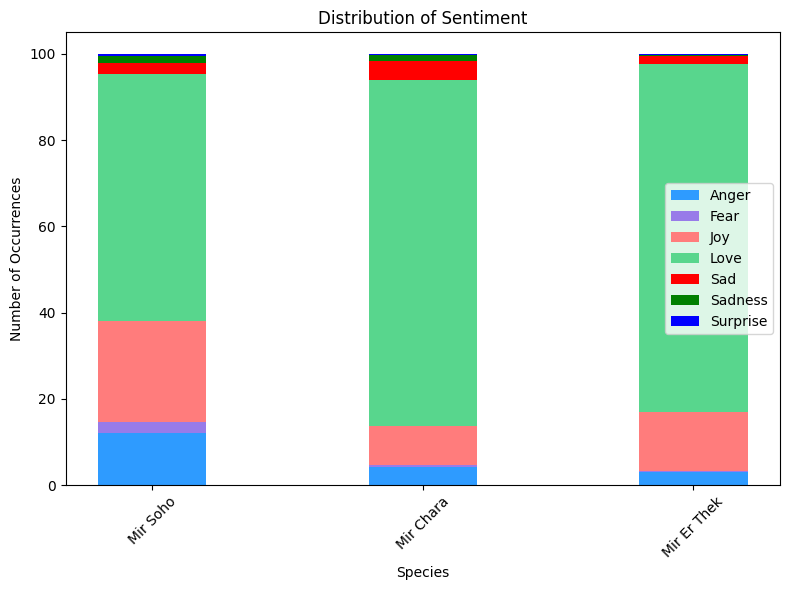

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define custom colors for each sentiment type
colors = ['#2E9BFF', '#987BE9', '#FF7C7C', '#58D68D', 'red', 'green', 'blue']

species = (
    "Mir Soho",  
    "Mir Chara", 
    "Mir Er Thek",  
)
weight_counts = {
    "Anger": spm2.T[0],
    "Fear": spm2.T[1],
    'Joy':spm2.T[2],
    "Love": spm2.T[3],
    "Sad": spm2.T[4],
    "Sadness": spm2.T[5],
    "Surprise":spm2.T[6]
}

# Calculate the number of sentiment types
num_sentiments = len(weight_counts)

# Adjust width based on the number of sentiment types
width = 0.4

fig, ax = plt.subplots(figsize=(8, 6))

# Initialize bottom values with zeros for stacking
bottom = np.zeros(len(species))

# Stack the bars for each sentiment type with custom colors
for i, (sentiment, count) in enumerate(weight_counts.items()):
    plt.bar(species, count, width, label=sentiment, bottom=bottom, color=colors[i])
    bottom += count  # Update bottom for stacking

# Add labels and title
plt.xlabel("Species")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Sentiment")

# Adjust legend location
plt.legend(loc="best")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Ack
https://colab.research.google.com/drive/15h32YuSQ5YwVji8OynC9BvMaWGpsWyD2?usp=sharing#scrollTo=XGj0RdguKrDb
https://github.com/sagorbrur/bnlp/blob/main/docs/README.md#bengali-corpus-class